In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [280]:
res = 600
x = np.linspace(-1.0, 1.0, res)
y = np.linspace(-1.0, 1.0, res)

z = np.ones(res**2).reshape(res,res)

xx, yy = np.meshgrid(x, y, sparse=True)

r = np.sqrt(xx**2 + yy**2)
z[r >1] = 0

lat = np.arcsin(yy)
lon = np.arcsin(xx)

v_diffrot = 100*z*np.cos(lat)*np.sin(lon) *np.cos(lat/2)
v = 100*z*np.cos(lat)*np.sin(lon)



limb = 1.0*(1-0.64*(1-np.cos(r*np.pi/2)))
limb[r>1] = 0

v *= limb
v_diffrot *= limb


In [281]:
limb[300]

array([0.        , 0.36335521, 0.36671172, 0.37006805, 0.3734241 ,
       0.37677978, 0.38013501, 0.38348967, 0.3868437 , 0.39019698,
       0.39354943, 0.39690096, 0.40025148, 0.40360088, 0.40694909,
       0.41029601, 0.41364154, 0.4169856 , 0.42032809, 0.42366892,
       0.427008  , 0.43034523, 0.43368053, 0.43701381, 0.44034496,
       0.44367391, 0.44700055, 0.4503248 , 0.45364657, 0.45696576,
       0.46028228, 0.46359605, 0.46690696, 0.47021493, 0.47351988,
       0.4768217 , 0.4801203 , 0.4834156 , 0.48670751, 0.48999593,
       0.49328078, 0.49656196, 0.49983938, 0.50311296, 0.5063826 ,
       0.50964821, 0.51290971, 0.516167  , 0.51941999, 0.5226686 ,
       0.52591274, 0.52915231, 0.53238723, 0.5356174 , 0.53884275,
       0.54206317, 0.54527859, 0.54848891, 0.55169405, 0.55489391,
       0.55808842, 0.56127747, 0.56446099, 0.56763888, 0.57081106,
       0.57397745, 0.57713794, 0.58029247, 0.58344093, 0.58658325,
       0.58971933, 0.5928491 , 0.59597246, 0.59908933, 0.60219

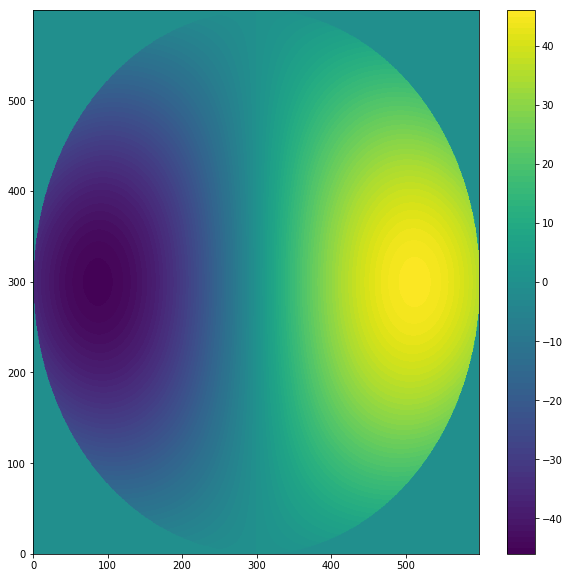

In [282]:
plt.figure(figsize=(10,10))
plt.contourf(v, 100)
plt.colorbar()

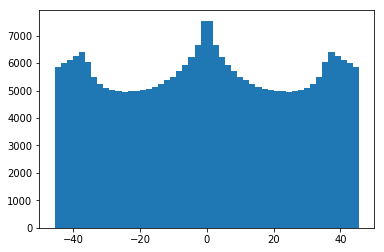

In [283]:
spr = v.flatten()

plt.hist(spr[spr != 0], 50)
plt.show()

In [284]:
np.mean(spr[spr != 0])

9.730622516339874e-16

In [304]:
xpos = np.linspace(0.7, 0.9, 100)
ypos = np.linspace(-1.4, 1.4, 100)
vpos1 = np.zeros_like(xpos)
vpos2 = np.zeros_like(xpos)

for i, xval in enumerate(xpos):

    newcirc = np.ones(res**2).reshape(res,res)

    newcirc[xx**2 + yy**2 >1] = 0

    yval = ypos[i]
    r = 0.15

    newcirc[(xx-xval)**2 + (yy-yval)**2 < r**2] = 0

    withpl1 = newcirc*v
    withpl2 = newcirc*v_diffrot
    
    #plt.figure(figsize=(5,5))
    #plt.contourf(withpl, 50)
    #plt.show()

    vpos1[i] = np.mean(withpl1[withpl1 != 0])
    vpos2[i] = np.mean(withpl2[withpl2 != 0])    

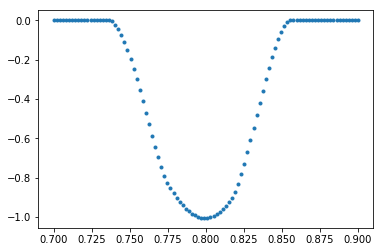

In [305]:
plt.plot(xpos, vpos1, '.')

#vpos_save = vpos + 0.0

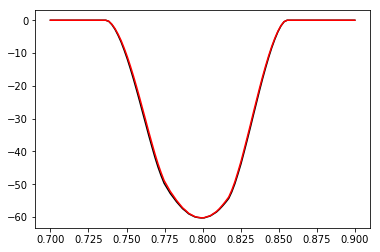

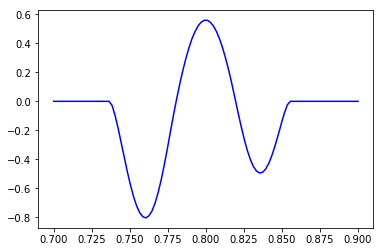

In [310]:
plt.plot(xpos, vpos1*60, 'k')
plt.plot(xpos, vpos2*60*1.00, 'r')
plt.show()
plt.plot(xpos, 60*(0.99*vpos1-vpos2), 'b')
plt.show()

In [301]:
#This is going to be hard to distinguish! But easier for the more misaligned systems. Good.